In [1]:
from data_loader.rectangles import RectanglesDataLoader
from model import feature_extractor
from model import descriptor
from model import decoder
from torch.optim import Adam
from model import vasf
import torch
from trainer import trainer
import random 
from logger import logger
dev = torch.device('cuda')

In [2]:
a = np.randn((2,4,3,32,32))


KeyboardInterrupt



In [ ]:
from utils.utils import positionalencoding1d

In [ ]:
train_dl = RectanglesDataLoader((32,32),(0,2),(4,10), 128, 1)

In [ ]:
m1 = feature_extractor.CNNFeatureExtractor(64)
m2 = descriptor.AutoregressiveMaskedDescriptor(64, 64, 64)
m3 = decoder.ImageGenerator(64, 64)
vasf_model = vasf.Vasf(m1, m2, m3).float()

In [ ]:
from utils.utils import count_parameters
count_parameters(vasf_model)

663876

In [ ]:
optim = torch.optim.Adam(vasf_model.parameters(), lr=3e-5)

In [ ]:
#my_trainer = trainer.SimpleTrainer(train_dl, train_dl, vasf_model, optim, dev)
loger = logger.Logger('experiments/test')
my_trainer = trainer.SimpleTrainer(train_dl, train_dl, vasf_model, optim, dev, loger)

experiments/test


0it [00:00, ?it/s]

iteration 250 avg loss: 0.1468
correct photo:


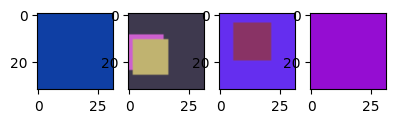

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


reconstructed by one token, mse: 0.1248


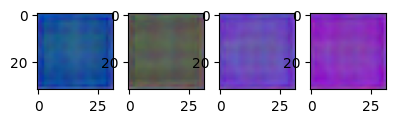

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


reconstructed by two tokens, mse: 0.108


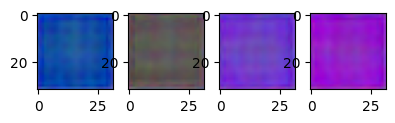

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


reconstructed by three tokens, , mse: 0.1059


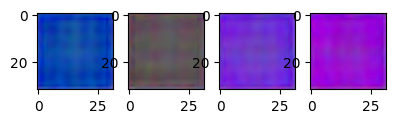

iteration 500 avg loss: 0.0978
correct photo:


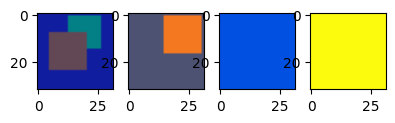

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


reconstructed by one token, mse: 0.1136


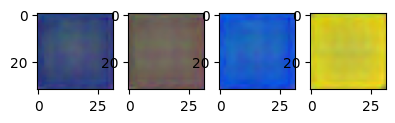

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


reconstructed by two tokens, mse: 0.0984


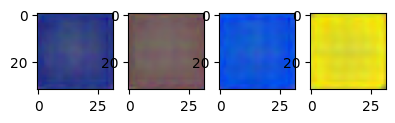

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


reconstructed by three tokens, , mse: 0.0954


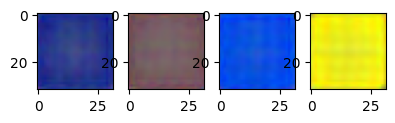

iteration 750 avg loss: 0.0941
correct photo:


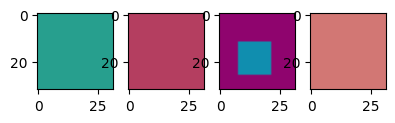

reconstructed by one token, mse: 0.1074


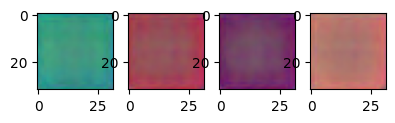

reconstructed by two tokens, mse: 0.0908


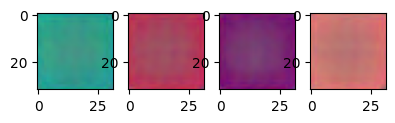

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


reconstructed by three tokens, , mse: 0.0881


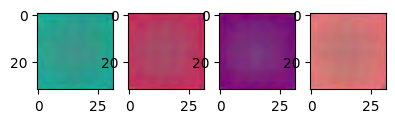

iteration 1000 avg loss: 0.0923
correct photo:


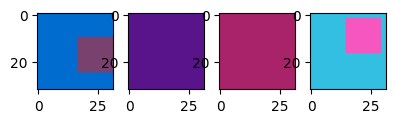

reconstructed by one token, mse: 0.0981


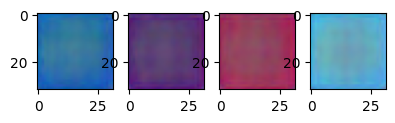

reconstructed by two tokens, mse: 0.0829


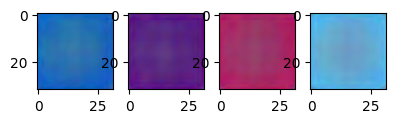

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


reconstructed by three tokens, , mse: 0.0807


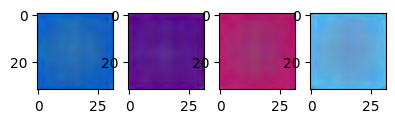

In [ ]:
train_dl.set_attrs(None, (0, 2), (14,16))
my_trainer.train(1000, 250, 3)